In [11]:
import pandas as pd

In [13]:
import numpy as np

In [15]:
url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"

In [17]:
df = pd.read_csv(url)

In [19]:
np.random.seed(42)

In [11]:
df['height'] = np.random.randint(150, 181, size=len(df))

In [17]:
print(df.isnull().sum())

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
height       0
dtype: int64


In [19]:
print(df.dtypes)

Name         object
Team         object
Number        int64
Position     object
Age           int64
Height       object
Weight        int64
College      object
Salary      float64
height        int32
dtype: object


In [21]:
print(df.columns)

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


In [23]:
df.columns = df.columns.str.strip().str.lower()  # Remove spaces and convert to lowercase
print(df.columns)

Index(['name', 'team', 'number', 'position', 'age', 'height', 'weight',
       'college', 'salary'],
      dtype='object')


In [25]:
print(df.head())

            name            team  number position  age  height  weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             college     salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [27]:
url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(url)
print(df.columns)

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


In [39]:
print(df.columns)

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


In [41]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns)

Index(['name', 'team', 'number', 'position', 'age', 'height', 'weight',
       'college', 'salary'],
      dtype='object')


In [43]:
print(df.head())

            name            team  number position  age  height  weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             college     salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


Employee Segregation by Position:
position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


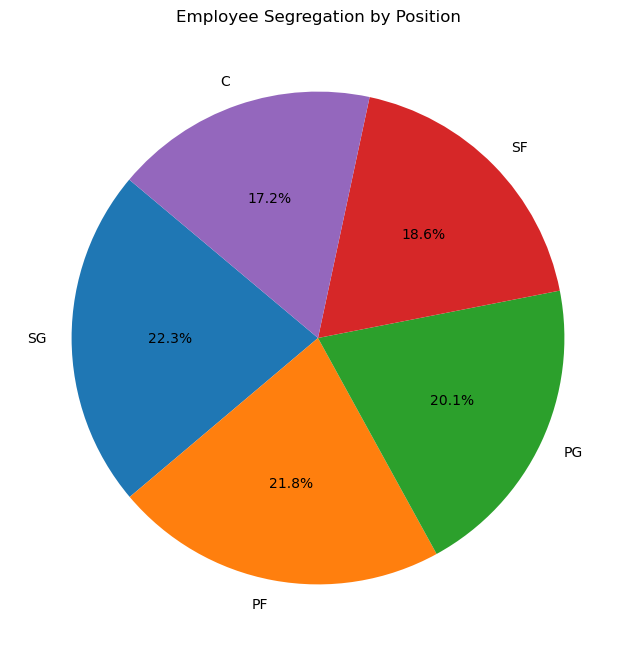

In [45]:
# Task 2: Segregation Based on Positions
position_counts = df['position'].value_counts()

# Display the results
print("Employee Segregation by Position:")
print(position_counts)

# Visualization: Pie chart for positions
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Employee Segregation by Position")
plt.ylabel('')
plt.show()

In [47]:
age_bins = [20, 30, 40, 50, 60]

In [49]:
age_labels = ['20-30', '31-40', '41-50', '51-60']

In [51]:
age_bins = [20, 30, 40, 50, 60]  # Age ranges
age_labels = ['20-30', '31-40', '41-50', '51-60']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
age_group_counts = df['age_group'].value_counts()

print("Predominant Age Group:")
print(age_group_counts)

Predominant Age Group:
age_group
20-30    346
31-40     91
41-50      0
51-60      0
Name: count, dtype: int64


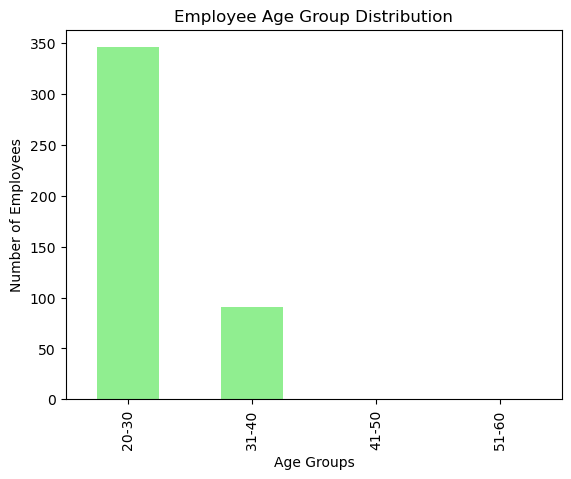

In [53]:
age_group_counts.plot(kind='bar', color='lightgreen', title="Employee Age Group Distribution")
plt.xlabel("Age Groups")
plt.ylabel("Number of Employees")
plt.show()

In [55]:
salary_by_team = df.groupby('team')['salary'].sum().sort_values(ascending=False)
salary_by_position = df.groupby('position')['salary'].sum().sort_values(ascending=False)

In [57]:
print("Team with Highest Salary Expenditure:")
print(salary_by_team.head(1))

Team with Highest Salary Expenditure:
team
Cleveland Cavaliers    106988689.0
Name: salary, dtype: float64


In [59]:
print("Position with Highest Salary Expenditure:")
print(salary_by_position.head(1))

Position with Highest Salary Expenditure:
position
C    466377332.0
Name: salary, dtype: float64


In [61]:
correlation = df['age'].corr(df['salary'])
print(f"Correlation between Age and Salary: {correlation}")

Correlation between Age and Salary: 0.21400941226570974


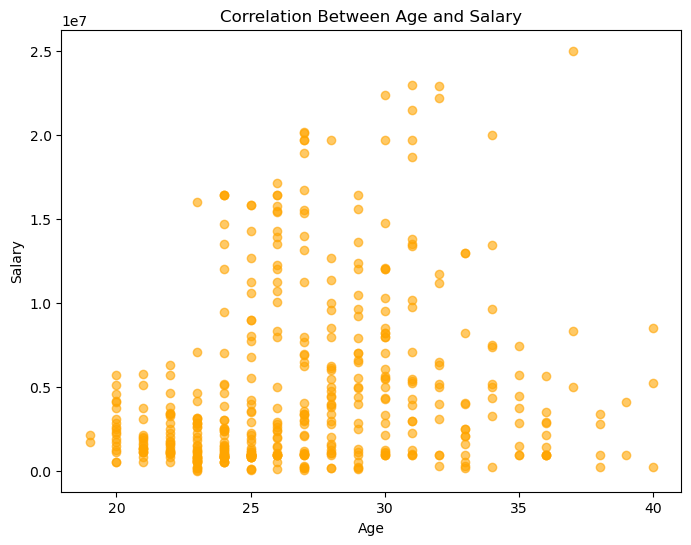

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['salary'], color='orange', alpha=0.6)
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

In [67]:
team_counts = df['team'].value_counts()
team_percentage = (team_counts / len(df)) * 100

print("Employee Distribution by Team:")
print(team_counts)
print("Percentage Split:")
print(team_percentage)

Employee Distribution by Team:
team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Percentage Split:
team
New Orleans Pelicans      4.148472
Memphis Gr

In [69]:
import matplotlib.pyplot as plt


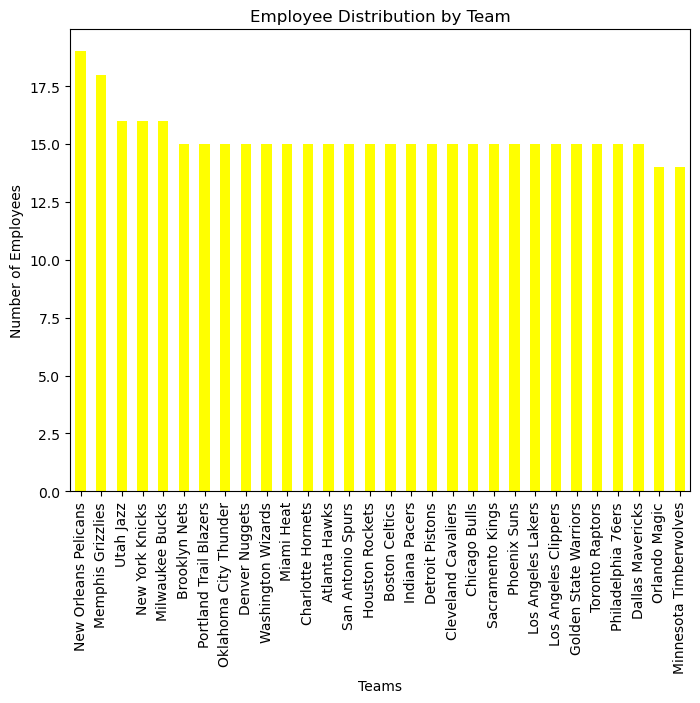

In [73]:
plt.figure(figsize=(8, 6))
team_counts.plot(kind='bar', color='yellow')
plt.title("Employee Distribution by Team")
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.show()

In [75]:
position_counts = df['position'].value_counts()

print("Employee Segregation by Position:")
print(position_counts)

Employee Segregation by Position:
position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64
